In [42]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [43]:
dataset = pd.read_csv("train_data.csv")

In [44]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


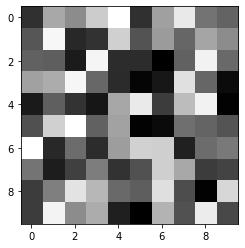

In [45]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [46]:
data = dataset.values[:5000]
data.shape

(5000, 785)

In [47]:
X, y = data[:,1:], data[:, 0]

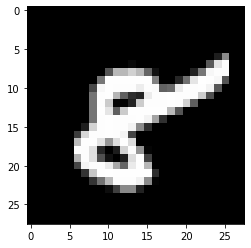

In [48]:
# Plotting digit
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [49]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(y_train)
# print(y_test)

In [50]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = [] # Contains list of tuples (distance, label)
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [51]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [52]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

In [ ]:
# test_df = pd.read_csv("test_data.csv")

In [ ]:
# test_df.head()

In [ ]:
# test_data = test_df.values
# test_images = test_data[:10]
# test_images.shape

In [ ]:
# for test in test_images:
#     im = test.reshape((28,28))
#     plt.figure()
#     plt.imshow(im, cmap='gray')
#     plt.show()
#     print("Label:", knn(X_train, y_train, test))